## Import relevant libraries

In [139]:
import pandas as pd
import numpy as np
import requests
import json
import os
from bs4 import BeautifulSoup
import tweepy
import io
import warnings
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns

## Data Gathering

Import downloaded csv file into a pandas dataframe

In [ ]:
#read twitter archive csv file
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

Download  and import image_prediction_enhanced file into pandas dataframe

In [81]:
import urllib.request 
urllib.request.urlretrieve('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', 'image_predictions.tsv')

('image_predictions.tsv', <http.client.HTTPMessage at 0x19f5288eb80>)

In [9]:
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

Read .json textfile into an empty list. Then create a pandas dataframe

In [10]:
tweet_data = []
with open('tweet_json.txt', 'r') as file:
        for line in file:
            data = json.loads(line)
            tweet_data.append(data)
            tweets_df = pd.DataFrame(tweet_data, columns=['id', 'retweet_count', 'favorite_count'])

In [11]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### The three dataframes we have now are:
- twitter_archive_enhanced
- image_predictions
- tweets_df

## Assessing Data

### twitter_archive_enhanced

In [12]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


- Most columns in the dataframe have NAN values

In [13]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### There are a lot of columns here having more null values than non-null values and I don't even think if these columns will be of any use when it comes to conducting analysis or visualisations. 
So many columns with null values. Columns like:
- in_reply_to_status_id, 
- in_reply_to_user_id, 
- retweeted_status_id, 
- retweeted_status_user_id. 
These columns are almost not usable if we are to conduct analysis with the data

#### Timestamp column has a string data type which should not be
#### Tweet_ID is an integer but should be a string as it will not be used for any calculation.

In [14]:
# Highlight notnull rows of the retweeted_status_id column
twitter_archive_enhanced_notnull = twitter_archive_enhanced.loc[twitter_archive_enhanced['retweeted_status_id'].notnull()]
twitter_archive_enhanced_notnull

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


- NotNull rows of retweets appear to be duplicates and not needed

In [15]:
twitter_archive_enhanced.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


- Some dogs have no value and have been represented as None

In [16]:
#based on the above, let us check for duplicates of dog names
twitter_archive_enhanced[twitter_archive_enhanced.name.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [17]:
twitter_archive_enhanced.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

- This clearly depicts there is an accuracy/quality issue with the twitter_archive_enhanced dataframe as most dogs have no name while soome have funny name reprensations like 'quite', 'a' and more.
Dogs with none as their names are 745
- Some doggo, floofer, pupper and puppo have no names a the are also represented with 'None'
- When I accessed the data in a spreadsheet, it was glarinig that some people sent photos of other animlas for rating.

In [18]:
#
twitter_archive_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

- Ratings given by the handle are like 13, 12, 11 10, etc with a denominator of 10. What we have above seem out of place and the ratings numerator column should be float because the denominator and numerator will be represented as fractions.

In [19]:
twitter_archive_enhanced[twitter_archive_enhanced.rating_numerator == 75]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None


- When I looked up the links to the observations above, it turns out they are 9.75 and not 75. This further proves that the ratings numerator column should be a float since some ratings are decimals.

In [20]:
# query counts for all the ratings in the rating_denominator column
twitter_archive_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

- This goes to show that there are inacurate values here, this because the uniform rating in the denominator column is 10

In [200]:
# Highlight all the rows where retweeted_status_id is null
xx = twitter_archive_enhanced[- twitter_archive_enhanced.retweeted_status_id.isnull()]

In [201]:
xx

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


- There are many invalid/duplicate retweets here

### Image_predictions

In [178]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


- There are invalid tweets here as a visual assessment shows that some predictions in p1 are not dogs. 

In [22]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- tweet_id should be a string

In [23]:
image_predictions.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1400,768609597686943744,https://pbs.twimg.com/media/CqqmWa7WcAAIM-n.jpg,1,basenji,0.183283,True,Italian_greyhound,0.136012,True,whippet,0.060130,True
529,676811746707918848,https://pbs.twimg.com/media/CWSEsO9WwAAX-fZ.jpg,1,Chihuahua,0.440916,True,Pomeranian,0.345806,True,cocker_spaniel,0.060331,True
1622,803380650405482500,https://pbs.twimg.com/media/CyYub2kWEAEYdaq.jpg,1,bookcase,0.890601,False,entertainment_center,0.019287,False,file,0.009490,False


- The prediction columns could be better without the underscores in their values

In [24]:
# lets assess the 'web_site' value of the p1 column
image_predictions.loc[image_predictions['p1'] == 'web_site']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
94,667550882905632768,https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg,1,web_site,0.998258,False,dishwasher,0.000201,False,oscilloscope,0.000142,False
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
130,668291999406125056,https://pbs.twimg.com/media/CUZABzGW4AE5F0k.jpg,1,web_site,0.995535,False,skunk,0.001363,False,badger,0.000686,False
213,670040295598354432,https://pbs.twimg.com/media/CUx2F6lVEAAvFev.jpg,1,web_site,0.901552,False,borzoi,0.026660,True,Chihuahua,0.012438,True
270,670822709593571328,https://pbs.twimg.com/media/CU89schWIAIHQmA.jpg,1,web_site,0.993887,False,Chihuahua,0.001252,True,menu,0.000599,False
715,685547936038666240,https://pbs.twimg.com/media/CYOONfZW8AA7IOA.jpg,1,web_site,0.923987,False,oscilloscope,0.009712,False,hand-held_computer,0.008769,False
960,705786532653883392,https://pbs.twimg.com/media/Cct1G6vVAAI9ZjF.jpg,1,web_site,0.550294,False,Labrador_retriever,0.148496,True,golden_retriever,0.148482,True
1210,742465774154047488,https://pbs.twimg.com/media/Ck3EribXEAAPhZn.jpg,1,web_site,0.997154,False,comic_book,0.000439,False,desktop_computer,0.000268,False
1317,755206590534418437,https://pbs.twimg.com/media/CnsIT0WWcAAul8V.jpg,1,web_site,0.906673,False,printer,0.008600,False,carton,0.004533,False
1443,775729183532220416,https://pbs.twimg.com/media/CsPxk85XEAAeMQj.jpg,1,web_site,0.989407,False,hand-held_computer,0.002139,False,menu,0.002115,False


- This table is made up of retweets and non-dog pictures, the observation below from the image prediction table confirms this. 

In [25]:
twitter_archive_enhanced.loc[twitter_archive_enhanced['tweet_id'] == 667550904950915073]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


### tweets_df

In [26]:
tweets_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [27]:
tweets_df.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [28]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


- tweet_id should be a string data type

### Data Quality Issues
#### Twitter archives enhanced

- Columns like in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id in the dataframe have NAN values
- There many retweets in most rows
- Inaccurate data types for tweet_id, timestamp and rating_numerator
- There are Missing records in the expanded_urls column
- Some dogs are represented by inacurate names like 'None' in the name column
- Inaccurate values in the rating_numerator and rating_denominator columns.
- The source column is a bit untidy cause of the urls and thus a little difficult to interpret.
- Duplicate value in the tweet column with dog name 'Phineas'

#### Image predictions 
- Wrong data type for tweet id.
- The use of underscores in the p1, p2, p3 prediction columns.
- p1_conf, p2_conf and p3_conf values should be percentages and not proportions.
- Inconsistent letter cases in the columns p1, p2 and p3. 

#### tweets_df
- Wrong data type for tweet id.
- id column should be tweet_id so as to be consistent with other tables

### Tidiness
#### Twitter archives enhanced
- Columns like Doggo, floofer, pupper, puppo should be column values for single column header
- There are two values in the timestamp column: date and time.
- The favourite count column from the tweet_df table should be added to this table.

#### Image predictions
- This table should be joined to the twitter archive table

### Cleaning Phase

In [222]:
# Create copies of each table for cleaning purpose
df_0 = twitter_archive_enhanced.copy()
df_1 = image_predictions.copy()
df_2 = tweets_df.copy()

### df_0 (Twitter archives enhanced)

### Define

- Remove all retweets with null values in the retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns

### Code

In [223]:
df_0 = df_0[df_0.retweeted_status_id.isnull()]

### Test

In [224]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

- Drop all columns associated with retweets: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

### Code

In [225]:
df_0 = df_0.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

### Test

In [226]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ 

### Define

- Drop in_reply_to_status_id and in_reply_to_user_id columns

### Code

In [227]:
df_0 = df_0.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1)

### Test

In [228]:
list(df_0)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Define

- Collapse columns `doggo`, `floofer`, `pupper` and `puppo` as values to a new column in the dataframe with the name '`dog_type'`, and change data type to category. Drop collapsed columns.

### Code

In [229]:
# Create a new column for dog_type and collapse all values for each row bearing dog types
df_0['dog_type'] = df_0.text.str.extract('(doggo | floofer | pupper | puppo)', expand = True)

# Eliminate spaces
df_0.dog_type = df_0.dog_type.str.strip()

In [230]:
# We drop irrelevant old dog type columns
df_0 = df_0.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

# Change data type to category
df_0.dog_type = df_0.dog_type.astype('category')

### Test

In [231]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2175 non-null   int64   
 1   timestamp           2175 non-null   object  
 2   source              2175 non-null   object  
 3   text                2175 non-null   object  
 4   expanded_urls       2117 non-null   object  
 5   rating_numerator    2175 non-null   int64   
 6   rating_denominator  2175 non-null   int64   
 7   name                2175 non-null   object  
 8   dog_type            240 non-null    category
dtypes: category(1), int64(3), object(5)
memory usage: 155.3+ KB


In [232]:
df_0.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


### Define

Perfome an inner join on then df_0 table (twitter_archive) and the df_1 (image_predictions) table. This is because we want only the tweets and the image prediction since we only want tweets with images and no retweets. 

After that, drop `img_num`, `p2`, `p2_conf`, `p2_dog`, `p3`, `p3_conf`, `p3_dog`  columns.

### Code

In [233]:
df_0 = df_0.merge(df_1, on = 'tweet_id', how = 'inner')

In [234]:
df_0 = df_0.drop(['img_num', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1)

### Test

In [235]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1994 non-null   int64   
 1   timestamp           1994 non-null   object  
 2   source              1994 non-null   object  
 3   text                1994 non-null   object  
 4   expanded_urls       1994 non-null   object  
 5   rating_numerator    1994 non-null   int64   
 6   rating_denominator  1994 non-null   int64   
 7   name                1994 non-null   object  
 8   dog_type            216 non-null    category
 9   jpg_url             1994 non-null   object  
 10  p1                  1994 non-null   object  
 11  p1_conf             1994 non-null   float64 
 12  p1_dog              1994 non-null   bool    
dtypes: bool(1), category(1), float64(1), int64(3), object(7)
memory usage: 191.0+ KB


### Define

Rename `id` to tweet_id on the tweet_df (df_2) table

### Code

In [236]:
df_2.rename({'id':'tweet_id'}, axis=1, inplace=True)

### Test

In [237]:
list(df_2)

['tweet_id', 'retweet_count', 'favorite_count']

### Define

Join tweet_df `(df_2)` table to the twitter archives `df_0` table to get the favourite and retweet counts.

### Code

In [238]:
df_0 = pd.merge(df_0, df_2, on = 'tweet_id', how = 'left')

### Test

In [239]:
df_0.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,p1,p1_conf,p1_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,9774,41048


### Define

- CHange the data types for `tweet_id`, `timestamp`, `rating_numerator` and `rating_denominato`r to `string`, `datetime` and `float` respectively.

### Code

In [240]:
df_0.tweet_id = df_0.tweet_id.astype(str)
df_0.timestamp = pd.to_datetime(df_0.timestamp, yearfirst = True)
df_0.rating_numerator = df_0.rating_numerator.astype(float)
df_0.rating_denominator = df_0.rating_numerator.astype(float)

### Test

In [241]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   expanded_urls       1994 non-null   object             
 5   rating_numerator    1994 non-null   float64            
 6   rating_denominator  1994 non-null   float64            
 7   name                1994 non-null   object             
 8   dog_type            216 non-null    category           
 9   jpg_url             1994 non-null   object             
 10  p1                  1994 non-null   object             
 11  p1_conf             1994 non-null   float64            
 12  p1_dog              1994 non-null 

### Define

- Splitt the timestamp column into two separate columns, namely: date and time 

### Code

In [242]:
df_0['date'] = [d.date() for d in df_0['timestamp']]
df_0['time'] = [d.time() for d in df_0['timestamp']]

df_0.date = pd.to_datetime(df_0.date)

In [243]:
df_0 = df_0.drop('timestamp', axis = 1)

### Test

In [244]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1994 non-null   object        
 1   source              1994 non-null   object        
 2   text                1994 non-null   object        
 3   expanded_urls       1994 non-null   object        
 4   rating_numerator    1994 non-null   float64       
 5   rating_denominator  1994 non-null   float64       
 6   name                1994 non-null   object        
 7   dog_type            216 non-null    category      
 8   jpg_url             1994 non-null   object        
 9   p1                  1994 non-null   object        
 10  p1_conf             1994 non-null   float64       
 11  p1_dog              1994 non-null   bool          
 12  retweet_count       1994 non-null   int64         
 13  favorite_count      1994 non-null   int64       

### Define

Remove links and replace the source column with clearer and understandable source details

### Code

In [245]:
# Define variables for the 3 occuring categories of the source column values
x = '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
y = '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
z = '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'

In [246]:
# Replace the column values
df_0.source = df_0.source.replace(x, 'Twitter for iPhone')
df_0.source = df_0.source.replace(y, 'Twitter Web Client')
df_0.source = df_0.source.replace(z, 'TweetDeck')

### Test

In [247]:
df_0.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'TweetDeck'],
      dtype=object)

### Define

Rename columns: jpg_url, p1, 'p1_conf, p1_dog
Convert p1 confidence column to percentages.
Replace  underscores in the p1 column with spaces.
change first letter of every word in the p1 column to upper case

### Code

In [248]:
df_0 = df_0.rename({'jpg_url': 'image_link', 'p1':'prediction',
                                                        'p1_conf': 'confidence_percentage', 'p1_dog': 'dog_predicted'},
                                                       axis = 'columns')

In [249]:
df_0.confidence_percentage = df_0.confidence_percentage.apply(lambda x: round(x*100, 2))

In [250]:
df_0.prediction = df_0.prediction.str.replace('_', ' ')
df_0.prediction = df_0.prediction.str.title()

### Test

In [251]:
df_0.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,image_link,prediction,confidence_percentage,dog_predicted,retweet_count,favorite_count,date,time
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,13.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,9.70,False,8853,39467,2017-08-01,16:23:56
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,13.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,32.36,True,6514,33819,2017-08-01,00:17:27
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,12.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,71.60,True,4328,25461,2017-07-31,00:18:03
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,13.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper Towel,17.03,False,8964,42908,2017-07-30,15:58:51
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,12.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,55.57,True,9774,41048,2017-07-29,16:00:24


### Define

There over 500 dog names with 'None', replace all of them with their corresponding names as seen in the 'text' column.

### Code

In [252]:
#filter the rows with the word 'named' in the text and the name is in lowercase
name_index = df_0.loc[df_0.text.str.contains('named') & df_0.name.str.islower()].index.tolist()
name_indices = df_0.index.tolist()
for i in name_indices:
    if i in name_index:
        for ele in list(range(len(name_index))):
            # make a list of all texts with 'named' in them and the name value is lowercase         
            text_list = (df_0.loc[df_0.text.str.contains('named') & df_0.name.str.islower()].text).tolist()
            #locate the index position in every text value in the list where 'named' appears
            position = text_list[ele].find('named')
            #use the index position to extract a particular pattern of dog name out of the text and then assign it to the
            #corresponding name value
            t = df_0.loc[df_0.index == i, 'text'].str[position+6:].str.extract(r'([A-Z][a-z]+)', expand = True)[0]
            df_0.loc[df_0.index == i, 'name'] = t
            break

In [253]:
# replace all None values in name column with np.nqn
df_0.name = df_0.name.replace('None', np.nan)

### Test

In [254]:
df_0.loc[df_0['name'] == 'None']

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,image_link,prediction,confidence_percentage,dog_predicted,retweet_count,favorite_count,date,time


### Define

Change wrong values in the rating_numerator column, where the numbers before the decimal were scraped off, with the correct values in the corresponding text column.

### Code

In [255]:
# Extract all text values containing float values and a forward slash
extracted_values = df_0.loc[df_0.text.str.contains('(\d+\.\d+\/)'), 'text'].str.extract('(\d+\.\d+)')

# Assign the above values to the rating_numerator column
df_0.loc[df_0.text.str.contains('(\d+\.\d+\/)'), 'rating_numerator'] = extracted_values

C:\Users\AZUREL~1\AppData\Local\Temp/ipykernel_4304/2416170113.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  extracted_values = df_0.loc[df_0.text.str.contains('(\d+\.\d+\/)'), 'text'].str.extract('(\d+\.\d+)')
C:\Users\AZUREL~1\AppData\Local\Temp/ipykernel_4304/2416170113.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_0.loc[df_0.text.str.contains('(\d+\.\d+\/)'), 'rating_numerator'] = extracted_values


In [256]:
# When visually assessed, the ratings at index 925 were incorrect, rating_numerator and rating_denominator 
# their values should be 11 and 10 respectively instead of 50
df_0.loc[df_0.index == 925, 'rating_numerator'] = 11
df_0.loc[df_0.index == 925, 'rating_denominator'] = 10

### Test

In [257]:
#filtering out the rows which contain text values with floating point numbers as ratings
df_0.loc[df_0.text.str.contains('(\d+\.\d+\/)')]

C:\Users\AZUREL~1\AppData\Local\Temp/ipykernel_4304/447704116.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_0.loc[df_0.text.str.contains('(\d+\.\d+\/)')]


,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,image_link,prediction,confidence_percentage,dog_predicted,retweet_count,favorite_count,date,time
39,883482846933004288,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,NaN,5.0,Bella,NaN,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,Golden Retriever,94.31,True,10407,46860,2017-07-08,00:28:19
503,786709082849828864,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,NaN,75.0,Logan,NaN,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,Pomeranian,46.73,True,7069,20296,2016-10-13,23:23:56
553,778027034220126208,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,NaN,27.0,Sophie,NaN,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,Clumber,94.67,True,1885,7320,2016-09-20,00:24:34
1374,680494726643068929,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,NaN,26.0,NaN,NaN,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,Kuvasz,43.86,True,542,1879,2015-12-25,21:06:00


## Image prediction (df_1)

### Define

tweet_id datatype will be changed to string

### Code

In [258]:
df_1.tweet_id = df_0.tweet_id.astype(str)

### Test

In [259]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1994 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Define

Replace the underscores in the p1, p2 and p3 columns by spaces.

### Code

In [260]:
df_1.p1 = df_1.p1.str.replace('_',' ')
df_1.p2 = df_1.p2.str.replace('_',' ')
df_1.p3 = df_1.p3.str.replace('_',' ')

### Test

In [261]:
df_1[['p1', 'p2', 'p3']]

,p1,p2,p3
0,Welsh springer spaniel,collie,Shetland sheepdog
1,redbone,miniature pinscher,Rhodesian ridgeback
2,German shepherd,malinois,bloodhound
3,Rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,Rottweiler,Doberman
...,...,...,...
2070,basset,English springer,German short-haired pointer
2071,paper towel,Labrador retriever,spatula
2072,Chihuahua,malamute,kelpie
2073,Chihuahua,Pekinese,papillon


### Define

Change proportions in the p1_conf, p2_conf and p3_conf columns values to percentages.

### Code

In [262]:
df_1.p1_conf = df_1.p1_conf.apply(lambda x: round(x*100, 2))
df_1.p2_conf = df_1.p2_conf.apply(lambda x: round(x*100, 2))
df_1.p3_conf = df_1.p3_conf.apply(lambda x: round(x*100, 2))

### Test

In [263]:
df_1[['p1_conf', 'p2_conf', 'p3_conf']]

,p1_conf,p2_conf,p3_conf
0,46.51,15.67,6.14
1,50.68,7.42,7.20
2,59.65,13.86,11.62
3,40.81,36.07,22.28
4,56.03,24.37,15.46
...,...,...,...
2070,55.57,22.58,17.52
2071,17.03,16.81,4.08
2072,71.60,7.83,3.14
2073,32.36,9.06,6.90


### Define

Change every first letter in every of the p1, p2, p3 columns to upper case 

### Code

In [264]:
df_1.p1 = df_1.p1.str.title()
df_1.p2 = df_1.p2.str.title()
df_1.p3 = df_1.p3.str.title()

### Test

In [265]:
df_1.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,46.51,True,Collie,15.67,True,Shetland Sheepdog,6.14,True
1,892177421306343426,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,50.68,True,Miniature Pinscher,7.42,True,Rhodesian Ridgeback,7.20,True
2,891815181378084864,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,59.65,True,Malinois,13.86,True,Bloodhound,11.62,True
3,891689557279858688,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,40.81,True,Redbone,36.07,True,Miniature Pinscher,22.28,True
4,891327558926688256,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,56.03,True,Rottweiler,24.37,True,Doberman,15.46,True


### Define

Rename jpg_url, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog columns for better presentation

### Code

In [266]:
df_1 = df_1.rename({'jpg_url': 'image_link', 'p1': 'prediction_A','p1_conf': 'confidence_percent_A', 'p1_dog': 'breed_predicted_A',
                                                          'p2': 'prediction_B', 'p2_conf': 'confidence_percent_B',
                                                          'p2_dog': 'breed_predicted_B', 'p3': 'prediction_C',
                                                          'p3_conf': 'confidence_percent_C', 'p3_dog': 'breed_predicted_C'},
                                                         axis = 'columns')

### Test

In [267]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              1994 non-null   object 
 1   image_link            2075 non-null   object 
 2   img_num               2075 non-null   int64  
 3   prediction_A          2075 non-null   object 
 4   confidence_percent_A  2075 non-null   float64
 5   breed_predicted_A     2075 non-null   bool   
 6   prediction_B          2075 non-null   object 
 7   confidence_percent_B  2075 non-null   float64
 8   breed_predicted_B     2075 non-null   bool   
 9   prediction_C          2075 non-null   object 
 10  confidence_percent_C  2075 non-null   float64
 11  breed_predicted_C     2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


## Tweet_df (df_2)

### Define

- Change tweet_id datatype from to string

### Code

In [268]:
df_2.tweet_id = df_2.tweet_id.astype(str)

### Test

In [269]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


## Store Cleaned Datasets

In [270]:
df_0.to_csv('cleaned_twitter_archive.csv', index = False)
df_1.to_csv('cleaned_image_predicitons.csv', index = False)
df_2.to_csv('cleaned_tweet_counts.csv', index = False)

## Analysis and Visualization

### Is there a positive relationship between retweets and favorite_count. What is the correlation coefficient?

In [271]:
# Import Data
df = pd.read_csv("cleaned_twitter_archive.csv")

In [272]:
list(df)

['tweet_id',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_type',
 'image_link',
 'prediction',
 'confidence_percentage',
 'dog_predicted',
 'retweet_count',
 'favorite_count',
 'date',
 'time']

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               1994 non-null   int64         
 1   source                 1994 non-null   object        
 2   text                   1994 non-null   object        
 3   expanded_urls          1994 non-null   object        
 4   rating_numerator       1990 non-null   float64       
 5   rating_denominator     1994 non-null   float64       
 6   name                   1448 non-null   object        
 7   dog_type               216 non-null    object        
 8   image_link             1994 non-null   object        
 9   prediction             1994 non-null   object        
 10  confidence_percentage  1994 non-null   float64       
 11  dog_predicted          1994 non-null   bool          
 12  retweet_count          1994 non-null   int64         
 13  fav

0.91294662741837

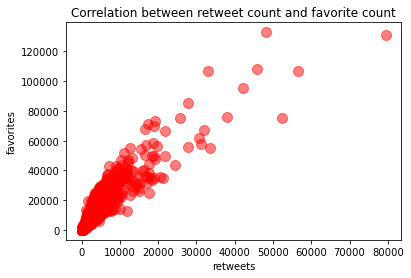

In [281]:
# Create a scatterplot between retweet_count and favorite_count to study their relationship
df.plot(kind = 'scatter', x = "retweet_count", y = "favorite_count", alpha = 0.5, color = 'red', s = 100)
plt.xlabel('retweets'), plt.ylabel('favorites'),
plt.title('Correlation between retweet count and favorite count')

df['retweet_count'].corr(df['favorite_count'])

- We can see a positive corelation between the retweet count and favorites and state that retweet happens to the favorite dog tweets.
- The correlation coefficient is 0.9

### Which is the highest tweet source?

In [274]:
source_count = df.source.value_counts()

Text(0.5, 0, 'Source')

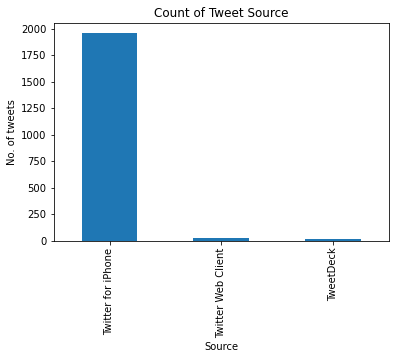

In [282]:
source_count.plot.bar()
plt.title('Count of Tweet Source')
plt.ylabel('No. of tweets')
plt.xlabel('Source')

- Twitter for iPhone is the most tweet sources with over 2000 tweets

### Which dog under the name column had the highest number of retweets?

In [283]:
# get name withe max retweet count
df.groupby(['name'],as_index=False)['retweet_count'].max().sort_values(by=['retweet_count'])

,name,retweet_count
456,Kallie,45
96,Bloo,45
186,Christoper,51
467,Keet,57
322,Fwed,60
...,...,...
472,Kenneth,31989
408,Jamesy,32883
101,Bo,42228
265,Duddles,45849


- Stephan with over 56k retweets got the highest retweets

### Which hour of the day has the most tweet?

In [284]:
df['time'] = pd.to_datetime(df['time'])
df['Hour'] = df.time.apply(lambda time: time.strftime('%H'))
df.Hour.value_counts()

01    278
00    253
02    210
16    194
03    170
17    161
23    109
18    100
04     96
15     91
19     81
20     75
21     71
22     67
05     26
14      8
06      3
13      1
Name: Hour, dtype: int64

- Tweets were tweeted most between 12 AM and 2 AM with 1 AM being the highest

(Text(0.5, 1.0, 'Tweet Hours'), Text(0.5, 0, 'count'), Text(0, 0.5, 'Tweet'))

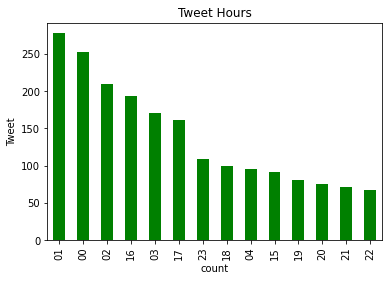

In [285]:
#Create a bar chart for tweet counts against time(hour)

df_timeHour = df.groupby('Hour').filter(lambda x: len(x) >= 30)
df_timeHour['Hour'].value_counts().plot(kind = 'bar', color ='green')
plt.title('Tweet Hours'), plt.xlabel('count'), plt.ylabel('Tweet')

- As seen on the chart above, there were more tweets about dogs during the midnight hours